In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
# Step 2: Load the Dataset
df = pd.read_csv('D:/position_salary.csv',encoding='latin1')
df.head()

,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926223
3,Senior Software Engineer,Jalandhar,Male,NaN,27,2403560
4,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128404


In [8]:
# Step 3: Explore and Understand the Data
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


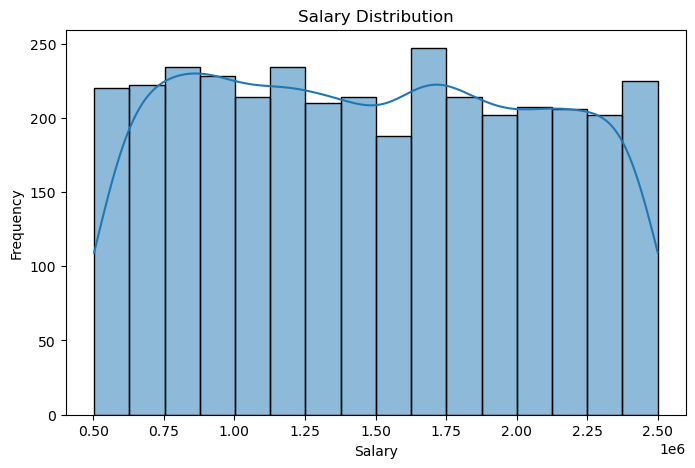

In [14]:
# Step 4: Visualize Salary Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [90]:
# Step 5: Preprocessing - Encode Categorical Columns
df_encoded = pd.get_dummies(df, columns=['Position'], drop_first=True)
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']
print(X.head())
print(y.head())

    Location  Gender    Education  Experience (Years)  \
0  Ghaziabad  Female  B.Tech/B.E.                  11   
1  New Delhi  Female  B.Tech/B.E.                  24   
2      Noida  Female          BCA                  25   
3  Jalandhar    Male          NaN                  27   
4     Meerut    Male          B.A                  11   

   Position_.Net /JavaScript  Position_.Net Architect  \
0                      False                    False   
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   Position_.Net Developer  Position_.Net Developer    \
0                    False                      False   
1                    False                      False   
2                    False                      False   
3                    False                      False   
4                    False   

In [58]:
# Step 6: Standardize the Data
X = X.select_dtypes(include=[np.number])
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-0.81331635]
 [ 1.06143337]
 [ 1.20564489]
 [ 1.49406793]
 [-0.81331635]]


In [40]:
# Step 7: Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

Explained Variance Ratio: [1.]


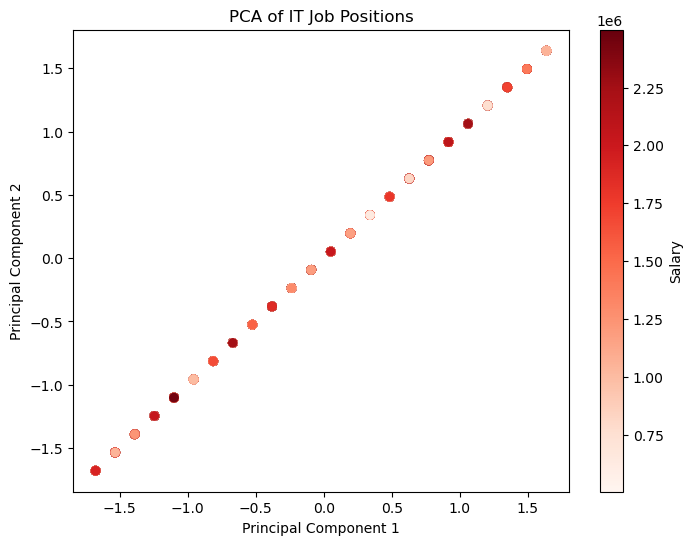

Explained Variance Ratio: [1.]


In [86]:
# Step 8: Visualize PCA Output
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 0], c=y, cmap='Reds')
plt.colorbar(label='Salary')
plt.title('PCA of IT Job Positions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

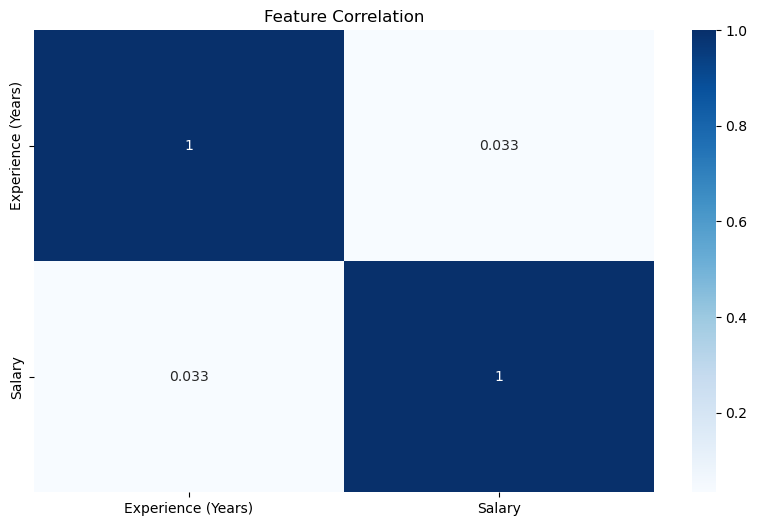

In [82]:
# Step 9: Optional - Correlation Heatmap
numeric_df = df_encoded.select_dtypes(include=[np.number])
plst.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation')
plt.show()
